In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [7]:
body_fat = pd.read_csv(r'C:\Users\User\Desktop\Gamboo (1)\Body fat\surveyofbodyfat.csv')

In [8]:
body_fat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [9]:
body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


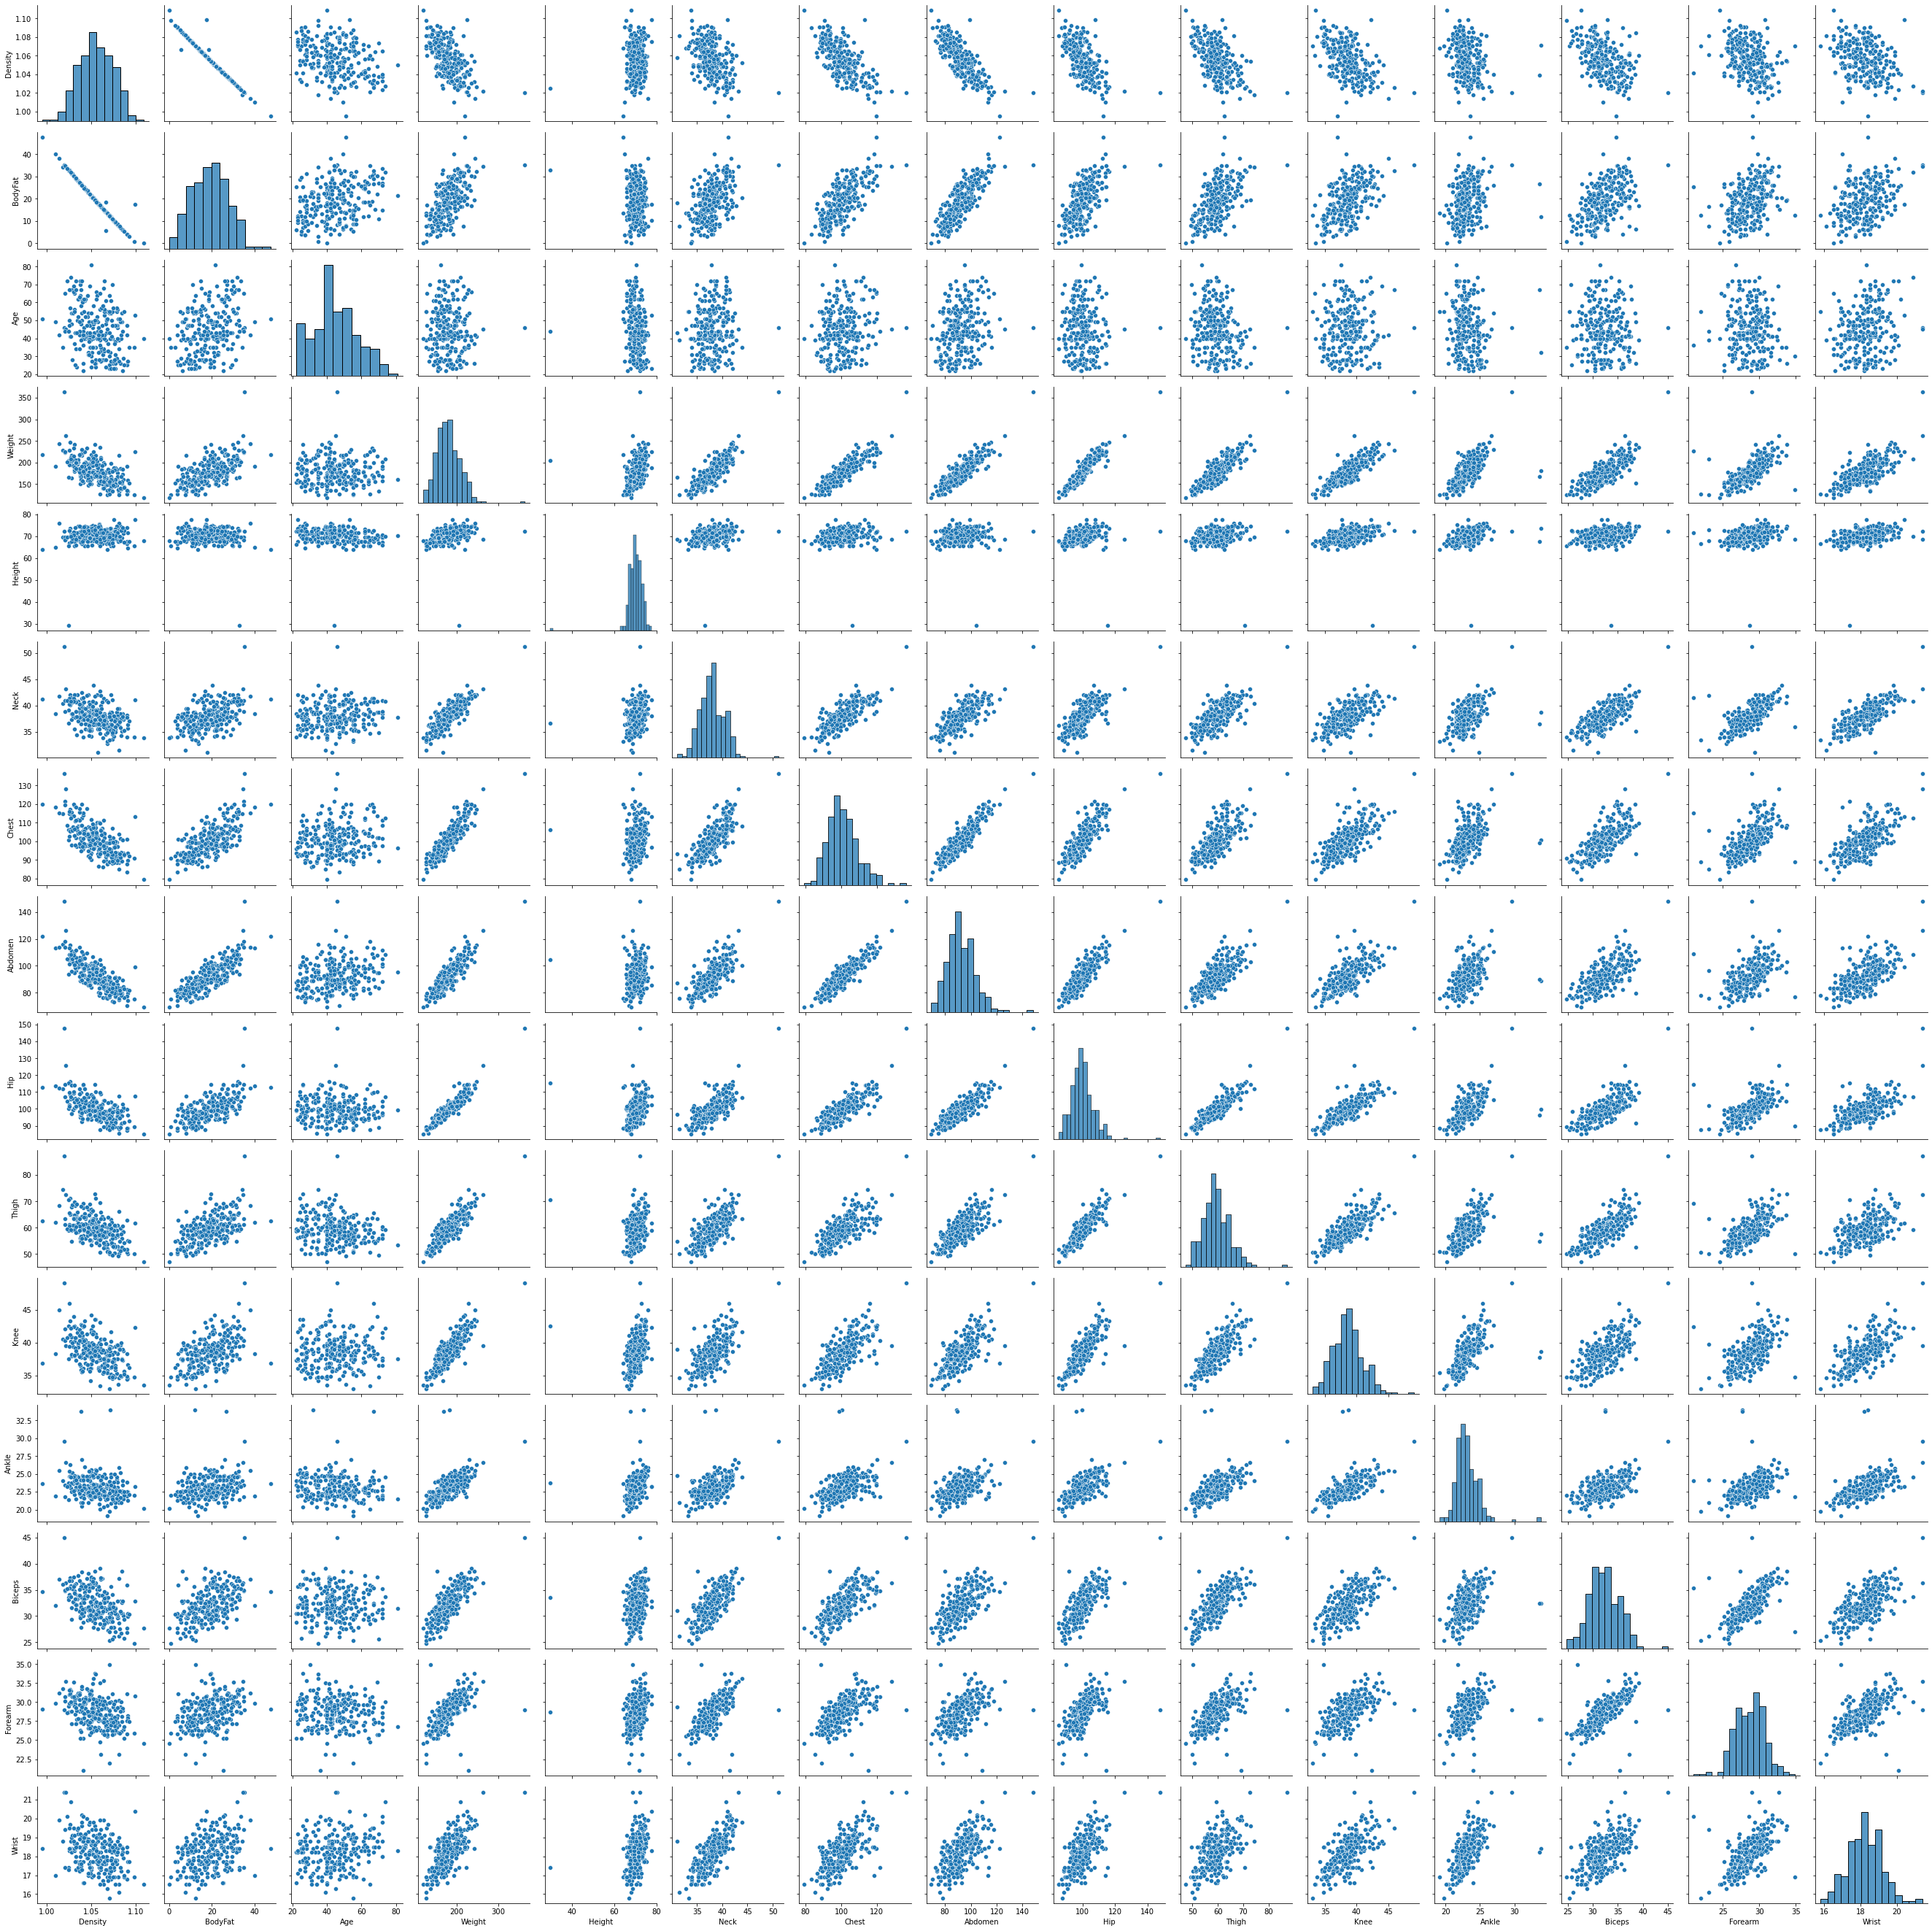

In [10]:

f = sns.PairGrid(body_fat[:])
f.map_diag(sns.histplot)
f.map_offdiag(sns.scatterplot)

<AxesSubplot:>

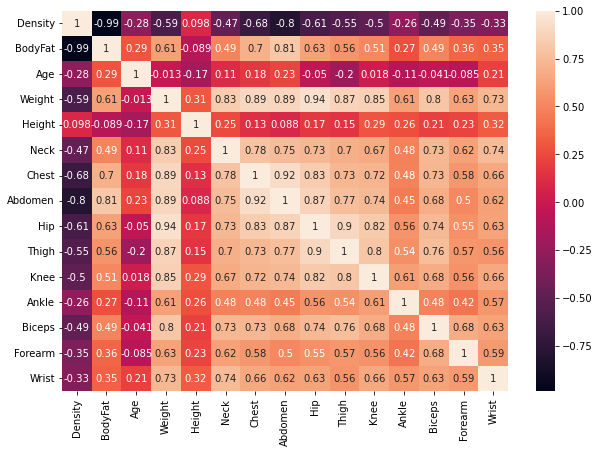

In [11]:
plt.figure(figsize = (10 , 7))
sns.heatmap(body_fat.corr() , annot = True)
    

In [12]:
features = body_fat.drop(columns = ['BodyFat'])
target = body_fat.BodyFat

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(features , target)

# LinearRegression

In [14]:
lin = LinearRegression()

In [15]:
lin.fit(X_train , Y_train)

LinearRegression()

In [16]:
lin_pred = lin.predict(X_test)

In [17]:
r2_score(lin_pred , Y_test)

0.9898504188872834

# Decission

In [18]:
dec = DecisionTreeRegressor()
dec.fit(X_train , Y_train)

DecisionTreeRegressor()

In [19]:
dec_pred = dec.predict(X_test)

In [20]:
r2_score(dec_pred , Y_test)

0.9798030529343751

# MLPRegression

In [21]:
mlp = MLPRegressor()
mlp.fit(X_train , Y_train)
mlp_pred = mlp.predict(X_test)

In [22]:
r2_score(mlp_pred , Y_test)

-27.693725180770095

# RandomForest

In [23]:
random_forest = RandomForestRegressor()

In [24]:
random_forest.fit(X_train , Y_train)
random_forest_pred = random_forest.predict(X_test)

In [25]:
r2_score(random_forest_pred , Y_test)

0.9636215123361989

# KNeighbors

In [26]:
kneighbors = KNeighborsRegressor()
kneighbors.fit(X_train , Y_train)
kneighbors_pred = kneighbors.predict(X_test)
r2_score(kneighbors_pred , Y_test)

0.00044930772437823396

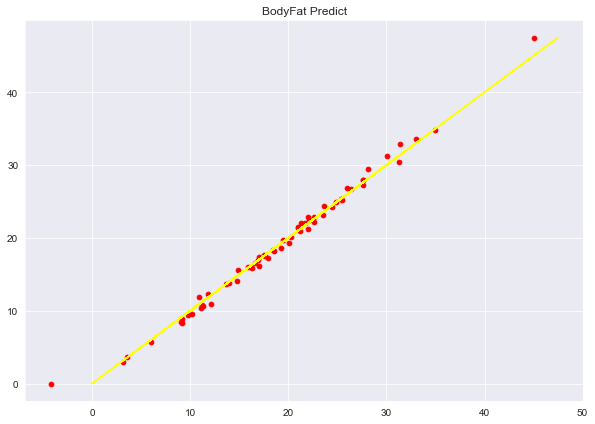

In [29]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')
plt.scatter(lin_pred , Y_test , s= 22 , c = 'red')
plt.plot(Y_test , Y_test , color = 'yellow')
plt.title('BodyFat Predict')
plt.savefig('Body_vis')